<a id='top'></a>

# Signality Tracking Data Exploratory Data Analysis
##### Notebook to explores three matches of Tracking data from the Allsvenskan provided by [Signality](https://www.signality.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 17/01/2020<br>
Notebook last updated: 31/01/2021

![title](../../../../img/signality_screenshot.png)

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Signality](https://www.signality.com/) Tracking data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [4]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv
import pprint as pp

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import re
import os
from collections import Counter, defaultdict
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patches
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

# Progress Bar
from tqdm import tqdm

# Fran Peralta's custom libraries for working with Signality data
from Libraries import Functions_PreprocessTrackingData as funcs
from Libraries import Dictionaries as dicts

# ML libraries
import scipy.signal as signal
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print('Setup Complete')

Setup Complete


In [5]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Filepaths

In [6]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_metrica = os.path.join(base_dir, 'data', 'metrica')
data_dir_signality = os.path.join(base_dir, 'data', 'signality')
data_dir_signality_tracking = os.path.join(base_dir, 'data', 'signality', 'raw', '2019', 'tracking_data')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_signality = os.path.join(base_dir, 'scripts', 'signality')
scripts_dir_metrica = os.path.join(base_dir, 'scripts', 'metrica')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_signality = os.path.join(base_dir, 'img', 'fig', 'signality')
video_dir = os.path.join(base_dir, 'video')
video_dir_signality = os.path.join(base_dir, 'video', 'signality')

### Defined Variables

In [7]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

# Define pitch dimensions
pitch_length = 106.0
pitch_width = 68

In [8]:
# Team colours
color_hammarby = 'g'
color_elfsborg = 'y'
color_malmo = 'b'
color_orebro = 'k'

### Custom Libraries for Tracking Data

In [ ]:
# Custom libraries for working with Signality data based on Laurie Shaw's Metric Sports libraries for Metrica Sports data

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir))

## Signality scripts - custom scripts derived from Laurie Shaw's Metrica scripts
import Signality_IO as sio
import Signality_Viz as sviz
import Signality_Velocities as svel
import Signality_PitchControl as spc
import Signality_EPV as sepv

## Laurie Shaw's custom libraries for working with Metrica Sports data
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv

### Notebook Settings

In [9]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [Signality](https://www.signality.com/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames, [matplotlib]() for plotting, [scipy]() for Machine Learning.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

---

## <a id='#section3'>3. Data Sources</a>
[Signality](https://www.signality.com/) is a...

![title](../../../../img/signality_logo.png)

The tracking data represents the location of every player on the pitch with a temporal frequency of 25 Hz and the corresponding match time for each tracking frame is specified.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).


We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2.1'>3.2.1. Data Dictionaries</a>
The [Signality](https://www.signality.com/) Events dataset has fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

### <a id='#section3.2'>3.2. Import Data</a>

##### <a id='#section3.2.1.1'> 3.2.1.1. IF Elfsborg

In [ ]:
df_tracking_elfsborg_home = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_elfsborg_home_22072019.csv')
df_tracking_elfsborg_away = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_elfsborg_away_22072019.csv')
df_lineup_elfsborg_home = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_elfsborg_home_22072019.csv')
df_lineup_elfsborg_away = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_elfsborg_away_22072019.csv')

##### <a id='#section3.2.1.2'> 3.2.1.2. Örebrö

In [ ]:
df_tracking_orebro_home = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_orebro_home_30902019.csv')
df_tracking_orebro_away = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_orebro_away_30902019.csv')
df_lineup_orebro_home = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_orebro_home_30092019.csv')
df_lineup_orebro_away = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_orebro_away_30092019.csv')

##### <a id='#section3.2.1.3'> 3.2.1.3. Malmö FF

In [ ]:
df_tracking_malmo_home = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_malmo_home_20102019.csv')
df_tracking_malmo_away = pd.read_csv(data_dir_signality + '/engineered/2019/tracking_data/' + 'hammarby_malmo_away_20102019.csv')
df_lineup_malmo_home = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_malmo_home_20102019.csv')
df_lineup_malmo_away = pd.read_csv(data_dir_signality + '/engineered/2019/lineup_data/' + 'hammarby_malmo_away_20102019.csv')

Data for Hammarby vs. Örebrö and Malmö FF appear to be duplicates of the IF Elfsborg match. Thee pipeline to process these files has been created, but the data is not correct.

#### <a id='#section3.2.2.'>3.2.2.  Preliminary Data Handling</a>
Due to the number of DataFrames - Home and Away, for three different matches, the following data handling is just for one DataFrame, for the Elfberg Home (`df_tracking_elfsborg_home`).

##### <a id='#section3.2.2.1.'>3.2.2.1. Tracking DataFrame</a>

Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [ ]:
# Display the first 5 rows of the raw DataFrame, df_tracking_elfsborg_home
df_tracking_elfsborg_home.head()

In [ ]:
# Display the last 5 rows of the raw DataFrame, df_tracking_elfsborg_home
df_tracking_elfsborg_home.tail()

In [ ]:
# Print the shape of the raw DataFrame, df_tracking_elfsborg_home
print(df_tracking_elfsborg_home.shape)

In [ ]:
# Print the column names of the raw DataFrame, df_tracking_elfsborg_home
print(df_tracking_elfsborg_home.columns)

The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [ ]:
# Data types of the features of the raw DataFrame, df_tracking_elfsborg_home
df_tracking_elfsborg_home.dtypes

All fourteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [ ]:
# Info for the raw DataFrame, df_tracking_elfsborg_home
df_tracking_elfsborg_home.info()

In [ ]:
# Description of the raw DataFrame, df_tracking_elfsborg_home showing some summary statistics for each numberical column in the DataFrame
df_tracking_elfsborg_home.describe()

In [ ]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_elfsborg_home
msno.matrix(df_tracking_elfsborg_home, figsize = (30, 7))

In [ ]:
# Counts of missing values
null_value_stats = df_tracking_elfsborg_home.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

The visualisation shows us very quickly that there a few missing values in certain columns, such as `Home_77_x` and `Home_77_y`. These are for substitutes that did not play the whole game.

##### <a id='#section3.2.2.2.'>3.2.2.2. Lineup DataFrame</a>

In [ ]:
# Display the first 5 rows of the raw DataFrame, df_lineup_elfsborg_home
df_lineup_elfsborg_home.head(18)

---

## <a id='#section5'>5. Exploratory Data Analysis</a>

This Exploratory Data Analysis works through each of the three matches of Tracking data
*    [Hammarby vs. IF Elfsborg - 22/07/2019 (5.1)](#section5.1)<br>
*    [Hammarby 5 vs. 1 Örebrö - 30/09/2019 (5.3)](#section5.3)<br>
*    [Hammarby vs. Malmö FF - 20/10/2019 (5.2)](#section5.2)<br>

For each of these matches, this Exploratory Data Analysis does the following
*    Determine the match facts including:
     - Match report;
     - Starting XI;
     - Highlights
*    Visualisation of the positions of the players for selected moments of play including their direction and velocity;
*    Measuring the physical performance of players including distances ran (and what types of movement), top speeds, accelerations, runs made; and
*    Pitch Control models.

### <a id='#section5.1'> 5.1. IF Elfsborg

#### <a id='#section5.1.1'>5.1.1. Match Facts</a>
Hammarby 5 vs. 2 IF Elfsborg on 22nd July 2019 [[link](https://us.soccerway.com/matches/2019/07/22/sweden/allsvenskan/hammarby/idrottsforening-elfsborg/2947255/)]

##### <a id='#section5.1.1'>5.1.1.1. Starting XI</a>

![title](../../../../img/hammarby_if_elfsborg_22072019_lineup.png)

In [ ]:
# Display the DataFrame
df_lineup_elfsborg_home.head(18)

In [ ]:
# Display the DataFrame
df_lineup_elfsborg_away.head(18)

##### <a id='#section5.1.1.2'>5.1.1.2. Goals and Asists</a>
*    Hammarby (5) vs. (2) IF Elfsborg
     - Imad Khalili 18' (1-0) (assist by N. Đurđić)
     - S. Gregersen (OG) 28' (2-0)
     - Imad Khalili 31' (3-0) (assist by M. Tankovic)
     - M. Tankovic 39'(4-0) (assist by N. Đurđić)
     - P. Frick 45'+1 (4-1) (assist by J. Karlsson)
     - J. Karlsson 47' (4-2) (assist by S. Strand)
     - A. Kačaniklić 63' (5-2) (assist by M. Tankovic)

##### <a id='#section5.1.1.3'>5.1.1.3. Match Highlights</a>

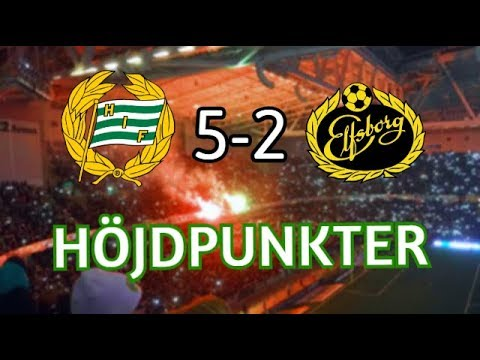

In [10]:
# Embed highlights for Hammarby (5) vs. (2) IFElfsborg (22/07/2019)

## YouTube link (COMMENTED OUT)
YouTubeVideo('qDSElNVs_5E', width=800, height=470)

## Local file
#Video(video_dir_signality + '/20190722_Hammarby_IFElfsborg.mp4', width=770, height=530)

#### <a id='#section5.1.2'>5.1.2. Visualisation of the positions of the players for selected moments of play including their direction and velocity</a>

The player velocities calculation does a several things things:
*    Where a player's speed exceeds 12 m/s (faster than the speed of Usain Bolt [[link](http://www.planet-science.com/categories/over-11s/human-body/2012/06/how-fast-is-usain-bolt.aspx#:~:text=Luckily%2C%20when%20Usain%20Bolt%20set,is%2027.44%20miles%20per%20hour!)]), this is a data collection error, and these values are set to NULL.
*    This velocity calculation also applies the SciPy [Savitzky-Golay filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) to the data that is a moving average of the raw velocities estimates, smoothing the data.

##### <a id='#section5.1.2.1'>5.1.2.1. Kick Off

In [ ]:
# Visualisation of the positions of the players at with location and speed just after kick-off</a>

## Define variables used in 'plot_frame' function
frame_idx = 20
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_kickoff.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_kickoff.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### <a id='#section5.1.2.2'>5.1.2.2. Visualisation of the first 60 seconds of the match</a>

In [ ]:
# Plotting tracking data -  of the first 60 seconds (i.e. 60 x 90 = 1500 frames)

## Define end frame for which to stop tracking player's movement
end_frame_idx = 1_500

## Define variables using in 'plot_pitch' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_pitch()
ax.plot(tracking_home['Home_25_x'].iloc[:end_frame_idx], tracking_home['Home_25_y'].iloc[:end_frame_idx], 'b.', MarkerSize=1)
ax.plot(tracking_home['Home_2_x'].iloc[:end_frame_idx], tracking_home['Home_2_y'].iloc[:end_frame_idx], 'g.', MarkerSize=1)
ax.plot(tracking_home['Home_4_x'].iloc[:end_frame_idx], tracking_home['Home_4_y'].iloc[:end_frame_idx], 'k.', MarkerSize=1)
ax.plot(tracking_home['Home_5_x'].iloc[:end_frame_idx], tracking_home['Home_5_y'].iloc[:end_frame_idx], 'r.', MarkerSize=1)
ax.plot(tracking_home['Home_3_x'].iloc[:end_frame_idx], tracking_home['Home_3_y'].iloc[:end_frame_idx], 'c.', MarkerSize=1)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_hammarby_backfive_first_60_seconds.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_hammarby_backfive_first_60_seconds.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

The blue line represents the goalkeeper and the four players in front are the back four.

##### <a id='#section5.1.2.3'>5.1.2.3. Hammarby's Goals

###### Hammarby's first goal
Imad Khalili 18' (1-0) (assist by N. Đurđić)

In [ ]:
# Visualise the player's positions just before the first goal

## Define end frame for which to stop tracking player's movement
frame_idx = 26_828

## Define variables used in 'plot_frame' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_1.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_1.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

Player 3 just passed into the box to 22, 40 is making a fast run deep into the box where he will receive the ball and then give the assist

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 26_600
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_1', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [11]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4', width=770, height=530)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

#####  Hammarby's second goal
S. Gregersen (OG) 28' (2-0)

In [ ]:
# Visualise the player's positions just before the second goal

## Define end frame for which to stop tracking player's movement
frame_idx = 41_080

## Define variables used in 'plot_frame' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_2.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_2.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 40_900
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_2.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_2', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's second goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_2.mp4', width=770, height=530)

Freekick by Hammarby leads to an own goal by Gregersen.

Two issues with the data:
1.    Ball disappearing (linear interpolation) - but don't get a feel for curve of the ball
2.    Player from the pack darts out - you may think they'd dramatically left their defensive shape causing the exposure

##### Hammarby's third goal
Imad Khalili 31' (3-0) (assist by M. Tankovic)

In [ ]:
# Visualise the player's positions just before the third goal

## Define end frame for which to stop tracking player's movement
frame_idx = 44_950

## Define variables used in 'plot_frame' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_3.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_goal_3.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 44_975
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_3.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_3', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_3.mp4', width=770, height=530)

##### Hammarby's forth goal
M. Tankovic 39'(4-0) (assist by N. Đurđić)

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 57_200
frame_range = 400

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_4.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_4', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's forth goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_4.mp4', width=770, height=530)

Goal is scored from a Hammarby goal kick that leads to a shot from outside the box by Tankovic.

##### IF Elfsborg's first goal
P. Frick 45'+1 (4-1) (assist by J. Karlsson)

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 67_575
frame_range = 400

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg


## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_5.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_5', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Elfsborg's first goal against Hammarby video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_5.mp4', width=770, height=530)

Goal for IF Elfsborg comes from a set piece

##### IF Elfsborg's second goal
J. Karlsson 47' (4-2) (assist by S. Strand)

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 73_500
frame_range = 5_000

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise tracking data using save_match_clip function from mviz library
sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range],tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_6', team_colors=(color_home, color_away), include_player_velocities=True)

In [ ]:
## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_6.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_6', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's forth goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_6.mp4', width=770, height=530)

##### Hammarby's fifth goal
A. Kačaniklić 63' (5-2) (assist by M. Tankovic)

#### <a id='#section5.1.3'>5.1.3. Measuring the physical performance of players</a>

##### <a id='#section5.1.3.1'>5.1.3.1. Generating physical performance reports</a>
Generate a bespoke physical summary of all the players for the Home team.

In [ ]:
# Physical summary for home players

## Define DataFrames
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away

## Drop player that did not play
temp = tracking_home.dropna(axis=1, how='all')

## Create DataFrame to identify the jersey number of the Home players
df_home_players = np.unique([ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home'])

## Create DataFrame where each row is a player
df_home_summary = pd.DataFrame(index=df_home_players)

## Display DataFrame of players and minutes played
df_home_summary

##### Minutes played
Added error handling to equal minutes to 0. DataFrame showing only 14 players, not 15 (Hammerby used all 3 subs).

In [ ]:
# Calculate minutes played for each player

## Create emplty list for minutes
lst_minutes = []

## Cycle through each player's jersey number in the home team and look for the first and last time for each player
for player in df_home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    try:
        player_minutes = (tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60     # convert to minutes
    except:
        player_minutes = 0
    lst_minutes.append(player_minutes)
df_home_summary['Minutes Played'] = lst_minutes

## 
df_home_summary = df_home_summary.sort_values(['Minutes Played'], ascending=False)


# Display DataFrame of players and minutes played
df_home_summary

##### Distance covered

In [ ]:
# Calculate total distance covered for each player

## Create emplty list for distance
lst_distance = []

## Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    df_player_distance = tracking_home[column].sum()/25./1000    # speed time time. Convert to km
    lst_distance.append(df_player_distance)

## 
df_home_summary['Distance [km]'] = lst_distance


# Display DataFrame of players their minutes played and distance covered
df_home_summary

In [ ]:
# Make a simple bar chart of distance covered for each player
plt.subplots()
ax = df_home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_hammarby.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_hammarby.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

Here we can visually see the total distances that the players ran. For example , we can see that player 11 ran about 5km and is most likely the goalkeeper. We can check this by plotting the position of the players at KO to find out exactly what position each player is playing.

##### Distance covered: walking, jogging, running, sprinting

In [ ]:
# Calculate total distance covered for each player for different types of movement

## Create empty list for distance
lst_distance = []

## Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    df_player_distance = df_tracking_elfsborg_home[column].sum()/25./1000    # speed time time. Convert to km
    lst_distance.append(df_player_distance)
df_home_summary['Distance [km]'] = lst_distance


# Display DataFrame of players their minutes played and distance covered
df_home_summary

In [ ]:
# Calculate total distance covered for each player for different types of movement

## Create empty lists for distances of different movements
lst_walking = []
lst_jogging = []
lst_running = []
lst_sprinting = []

## Cycle through each player's jersey number in the home team and 
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    ### Walking (less than 2m/s)
    player_distance = df_tracking_elfsborg_home.loc[tracking_home[column] <2, column].sum()/25./1000
    lst_walking.append(player_distance)
    ### Jogging (between 2 and 4 m/s)
    player_distance = df_tracking_elfsborg_home.loc[(tracking_home[column] >= 2) & (df_tracking_elfsborg_home[column] < 4), column].sum()/25./1000
    lst_jogging.append(player_distance)
    ### Running (between 4 and 7 m/s)
    player_distance = df_tracking_elfsborg_home.loc[(tracking_home[column] >= 4) & (df_tracking_elfsborg_home[column] < 7), column].sum()/25./1000
    lst_running.append(player_distance)
    ### Sprinting (greater than 7 m/s)
    player_distance = df_tracking_elfsborg_home.loc[tracking_home[column] >= 7, column].sum()/25./1000
    lst_sprinting.append(player_distance)

## Assign each movement list to a column in the Home Summary DataFrame
df_home_summary['Walking [km]'] = lst_walking
df_home_summary['Jogging [km]'] = lst_jogging
df_home_summary['Running [km]'] = lst_running
df_home_summary['Sprinting [km]'] = lst_sprinting


# Display DataFrame of players their minutes the distances covered for each movement type
df_home_summary

In [ ]:
# Make a clustered bar chart of distance covered for each player at each speed
ax = df_home_summary[['Walking [km]', 'Jogging [km]', 'Running [km]', 'Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_split_hammarby.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_split_hammarby.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

As we expected, it's the midfielders and forwards that do more sprinting.

##### Sustained sprints: how many sustained sprints per match

In [ ]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second

##
nsprints = []

##
sprint_threshold = 7 # minimum speed to be defined as a sprint {m/s}
sprint_window = 1 * 25

##
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff(1 * (np.convolve(1 * (tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
    nsprints.append(np.sum(player_sprints == 1 ))

##    
df_home_summary['# sprints'] = nsprints

In [ ]:
df_home_summary

##### <a id='#section5.1.3.2'>5.1.3.2. Plot the trajectories for a selected player's sprints

In [ ]:
# Plot the trajectories for each of A. Kačaniklić (player 2)'s sprints
player = '2'
column = 'Home_' + player + '_speed' # speed
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position

# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff(1 * (np.convolve(1 * (tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
player_sprints_start = np.where(player_sprints == 1)[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where(player_sprints == -1)[0] + int(sprint_window/2) + 1

In [ ]:
# Print frames in which player 10 started sprints
print(player_sprints_start)

In [ ]:
# Print frames in which player 10 started sprints
print(player_sprints_end)

In [ ]:
# now plot all the sprints
fig, ax = sviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(df_tracking_elfsborg_home[column_x].iloc[s], df_tracking_elfsborg_home[column_y].iloc[s], 'go')
    ax.plot(df_tracking_elfsborg_home[column_x].iloc[s:e+1], df_tracking_elfsborg_home[column_y].iloc[s:e+1], 'g')
    
## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_sprints_player_2.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_sprints_player_2.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

Notes from observing the tracking data of sprints for A. Kačaniklić (player 11):
*    The sprint to the by-line is an incident where the player is trying to keep the ball in play (ses Laurie's video in the last minute of video 2).

##### <a id='#section5.1.3.3'>5.1.3.3. Estimate the top speed of each player</a>

In [ ]:
# Define function to get the top speeds for a Tracking data DataFrame
def get_max_speeds(df):
    top_speeds = {}

    v_columns = [i for i in df.columns if '_speed' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_speeds['Player_' + p] = df[i].max()
    return top_speeds

In [ ]:
dict_home_top_speeds = get_max_speeds(tracking_home)
dict_away_top_speeds = get_max_speeds(tracking_home)

In [ ]:
dict_home_top_speeds

In [ ]:
dict_away_top_speeds

In [ ]:
plt.bar(dict_home_top_speeds.keys(), dict_home_top_speeds.values())
plt.title('Top Speed for players in the Home Team')
plt.ylabel('Speed (m/s)')
plt.xlabel('Players')
plt.show()

##### <a id='#section5.1.3.4'>5.1.3.4. Measure player accelaration from the tracking data and estimate the maximum rate of acceleration for each player</a>

In [ ]:
def get_max_acc(df):
    top_acc = {}

    v_columns = [i for i in df.columns if '_acceleration' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_acc['Player_' + p] = df[i].max()
    return top_acc

In [ ]:
dict_home_top_acc = get_max_acc(tracking_home)

In [ ]:
dict_away_top_acc = get_max_acc(tracking_home)

In [ ]:
dict_home_top_acc

In [ ]:
dict_away_top_acc 

In [ ]:
plt.bar(dict_home_top_acc.keys(), dict_home_top_acc.values())
plt.title('HomePlayers Top Acceleration')
plt.ylabel('Acceleration (m/s2)')
plt.xlabel('Players')
plt.show()

##### <a id='#section5.1.3.5'>5.1.3.5. Calculate how far each player ran</a>

In [ ]:
#### Plot time series of speed acceleration & distance to goal of all players
# Hammarby - Elfsborg
frame_start = 44950 # <- Ham-Elfs 3-0 #26550 <- Ham-Elfs 1-0 #58130 <- Ham-Öre 1-1
frame_range = 375       
tracking_timeplot = tracking_home.loc[frame_start:frame_start+frame_range-1,:]    # select time frame
columns = [c for c in tracking_timeplot.columns if c.split('_')[-1] in ['x','y','vx','vy']] 
tracking_timeplot = tracking_timeplot.drop(columns=columns) # drop except speed, acceleration & distance to goal
columns = [c for c in tracking_timeplot.columns if c.split('_')[-1] in ['acceleration','dist2goal']] 
tracking_speed = tracking_timeplot.drop(columns=columns)
columns = [c for c in tracking_timeplot.columns if c.split('_')[-1] in ['speed','dist2goal']]
tracking_acceleration = tracking_timeplot.drop(columns=columns)
columns = [c for c in tracking_timeplot.columns if c.split('_')[-1] in ['acceleration','speed']] 
tracking_dist2goal = tracking_timeplot.drop(columns=columns)
xtime = np.arange(frame_range)/25        # time in seconds

fig, axs = plt.subplots(3,1,sharex=True)
#fig.suptitle(f'Player {requested_player}', size=8)
axs[0].plot(xtime,tracking_speed)#,'g')
axs[0].set_ylabel('Speed [$m/s$]', size=8)
#axs[0].set_ylim(0,10)
axs[1].plot(xtime,tracking_acceleration)#,'g')
axs[1].set_ylabel('Acceleration [$m/s^2$]', size=8)
#axs[1].set_ylim(-10,10)
axs[2].plot(xtime,tracking_dist2goal)#,'g')
axs[2].set_ylabel('Distance to goal [$m$]', size=8)
axs[2].set_xlabel('Time [s]', size=8)
fig.align_ylabels()
plt.tight_layout()

In [ ]:
frame_plot = 1_000

In [ ]:
tracking_frame_home = sviz.calc_frame_coordinates(tracking_home, frame_plot)
tracking_frame_away = sviz.calc_frame_coordinates(tracking_away,frame_plot)

# Creating a Voronoi diagramof 1 tracking frame, not further investigated or used in report
vor = Voronoi(tracking_frame_away)
fig = voronoi_plot_2d(vor)
plt.show()

In [ ]:
frame_start = 26600
frame_range = 235

# for all players
nearest_tm_time = np.empty((1,11))
#nearest_opp = nearest_opp.reshape(1, -1)
for i in range(frame_start,frame_start+frame_range):
    nearest_tm = svel.calc_distance_nearest_teammate(tracking_home,i)                      
    nearest_tm_time = np.vstack((nearest_tm_time, nearest_tm))
nearest_tm_time = np.delete(nearest_tm_time, (0), axis=0)

In [ ]:
# for all players
nearest_opp_time = np.empty((1,11))
#nearest_opp = nearest_opp.reshape(1, -1)
for i in range(frame_start,frame_start+frame_range):
    nearest_opp = svel.calc_distance_nearest_opponent(tracking_home, tracking_away, i)                      
    nearest_opp_time = np.vstack((nearest_opp_time, nearest_opp))
nearest_opp_time = np.delete(nearest_opp_time, (0), axis=0)

In [ ]:
# Plot distance to nearest teammate for all 11 players
xtime = np.arange(frame_range)/25        # time in seconds
plt.plot(xtime,nearest_tm_time)
#plt.ylim(0,20)
plt.xlabel('Time [sec]')
plt.ylabel('Distance to nearest teammate [m]')
plt.show()
# Plot distance to nearest opponent for all 11 players
plt.plot(xtime,nearest_opp_time)
#plt.ylim(0,5)
plt.xlabel('Time [sec]')
plt.ylabel('Distance to nearest opponent [m]')
plt.show()

In [ ]:
requested_player = '13'

# Plot of 1 player
tracking_speed = tracking_speed[f'Home_{requested_player}_speed']
tracking_acceleration = tracking_acceleration[f'Home_{requested_player}_acceleration']
tracking_dist2goal = tracking_dist2goal[f'Home_{requested_player}_dist2goal']

In [ ]:
fig, axs = plt.subplots(4,1,sharex=True)
#fig.suptitle(f'Player {requested_player}', size=8)
axs[0].plot(xtime,tracking_speed.head(frame_range),'g')
axs[0].set_ylabel('Speed', size=8)
#axs[0].set_ylim(0,10)
axs[1].plot(xtime,tracking_acceleration.head(frame_range),'g')
axs[1].spines['bottom'].set_position('zero')
axs[1].set_ylabel('Acc', size=8)
#axs[1].set_ylim(-10,10)
axs[2].plot(xtime,tracking_dist2goal.head(frame_range),'g')
axs[2].set_ylabel('Dist to goal', size=8)
axs[3].plot(xtime,nearest_opp_time,'g')
axs[3].set_xlabel('Time [s]', size=8)
axs[3].set_ylabel('Nearest opp', size=8)
fig.align_ylabels()

#### <a id='#section5.1.4'>5.1.4. Pitch Control Models</a>
Using the Tracking data, we can use this to build your Pitch Control models in Python and demonstrate how it can be used to evaluate a player's passing options using tracking and event data. But what is a Pitch Control model?

Definition:
**Pitch control at a given location is the probability that a player (or team) will gain control of the ball if it moves directly to that location.**

Pitch control measures the probability that a team will retain possession of the ball if they pass it to another location on the field. It can be used to evaluate passing options for a player, and quantify the probability of success.

The method described here is based on work by [William Spearman](https://twitter.com/the_spearman), as described in his Friend of Tracking video tutorial: [[link](https://www.youtube.com/watch?v=X9PrwPyolyU)] and see below.

Also see Spearman's paper "Beyond Expected Goals" published at the 2018 MIT Sloan Sports Analytics Conference [[link](http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf)].

In the video below, Spearman explains the following for Pitch Control:
*    The principles behind pitch control models.
*    How they can be used to investigate player positioning.
*    How to extend them to account for ball motion.
*    How to combine pitch control models with measures of danger.
*    Defining 'off-ball scoring opportunity'
*    Extensions to pitch control.

In [ ]:
# Liverpool FC data scientist William Spearman's masterclass in Pitch Control
YouTubeVideo('X9PrwPyolyU', width=800, height=470)

Pitch Control visualisation are a great way to summarise not only the probabilities of success for any given passing option but it is also a nice way of visualising what options were available to a player on the ball at any given instant.

Visualisations use the `plot_pitchcontrol_for_event` function from the `sviz` library.

In [ ]:
# first get pitch control model parameters
params = spc.default_model_params()

In [ ]:
GK_numbers = [25,1] # Hammarby GK number = 27    # I think I can delete this

##### <a id='#section5.1.4.1'>5.1.4.1. Hammarby's first goal
Imad Khalili 18' (1-0) (assist by N. Đurđić)

###### Video

In [ ]:
# Embed video footage of Hammarby's first goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_video_goal_1.mp4', width=770, height=530)

###### Visualisation

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 26_600
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_1', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 26_828
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_1', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's first against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4', width=770, height=530)

###### Pitch Control

In [ ]:
# Visualisation of the Pitch Control of the players for the first goal

## Define variables used in 'generate_pitch_control' function
frame_idx = 26_828     # before 1-0 Ham-Elf
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg
cmap = LinearSegmentedColormap.from_list('mycmap', [color_away, 'white', color_home])

## Visualise player positions using plot_events function from sviz library
PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(frame_idx, tracking_home, tracking_home, tracking_away, params, GK_numbers, n_grid_cells_x = 50)
sviz.plot_pitchcontrol_for_event(frame_idx, tracking_home, tracking_home, tracking_away, PPCF, cmap, annotate=True )

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_1.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_1.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Visualisation of the Pitch Control of the players for the first goal

## Define variables used in 'generate_pitch_control' function
frame_idx = 26_600
starting_frame = frame_idx 
end_frame = starting_frame + 300
f = 25
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg
cmap = LinearSegmentedColormap.from_list('mycmap', [color_away, 'white', color_home])

## Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    PPCF,xgrid,ygrid = spc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, params, GK_numbers, field_dimen = (pitch_length, pitch_width), n_grid_cells_x=50)
    fig, ax = sviz.plot_pitchcontrol_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, PPCF, cmap, annotate=True)
    image = mplfig_to_npimage(fig)
    return image    # returns a 8-bit RGB array

## Create Pitch Control video if the file doesn't already exist
if not os.path.exists(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_1.mp4'):
    clip = mpy.VideoClip(make_frame, duration=((end_frame-starting_frame)/f)).set_fps(f)              # 2 seconds
    clip.write_videofile(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_1.mp4')    #video file is saved
else:
    pass

In [ ]:
# Embed Pitch Control model of Hammarby's first goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_1.mp4', width=770, height=530)

###### Delauney

In [ ]:
# Visualisation of the Delauney of the players for the first goal

## Define variables used in 'plot_delaunay_for_frame' function
frame_idx = 26_600
starting_frame = frame_idx 
end_frame = starting_frame + 300
f = 25
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame_delauney(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    fig, ax = sviz.plot_delaunay_for_frame(t2+starting_frame, tracking_home, tracking_away, team='Home', include_player_velocities=True)
    image = mplfig_to_npimage(fig)
    return image # returns a 8-bit RGB array

## Create Delauney video if the file doesn't already exist
if not os.path.exists(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_1.mp4'):
    clip = mpy.VideoClip(make_frame_delauney, duration=((end_frame-starting_frame)/f)).set_fps(f)    # 2 seconds
    clip.write_videofile(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_1.mp4')
else:
    pass 

In [ ]:
# Embed Delauney visualisation of Hammarby's first goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_1.mp4', width=770, height=530)

##### <a id='#section5.1.4.2'>5.1.4.2. Hammarby's third goal
Imad Khalili 31' (3-0) (assist by M. Tankovic)

###### Video

In [ ]:
# Embed video footage of Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_video_goal_3.mp4', width=770, height=530)

###### Visualisation

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 44_950
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_3.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_3', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_3.mp4', width=770, height=530)

###### Pitch Control

In [ ]:
# Visualisation of the Pitch Control of the players for the first goal

## Define variables used in 'generate_pitch_control' function
frame_idx = 45_100 
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg
cmap = LinearSegmentedColormap.from_list('mycmap', [color_away, 'white', color_home])

## Visualise player positions using plot_events function from sviz library
PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(frame_idx, tracking_home, tracking_home, tracking_away, params, GK_numbers, n_grid_cells_x = 50)
sviz.plot_pitchcontrol_for_event(frame_idx, tracking_home, tracking_home, tracking_away, PPCF, cmap, annotate=True )

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_3.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_3.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Visualisation of the Pitch Control of the players for the first goal

## Define variables used in 'generate_pitch_control' function
frame_idx = 44_975
starting_frame = frame_idx 
end_frame = starting_frame + 300
f = 25
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg
cmap = LinearSegmentedColormap.from_list('mycmap', [color_away, 'white', color_home])

## Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    PPCF,xgrid,ygrid = spc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, params, GK_numbers, field_dimen = (pitch_length, pitch_width), n_grid_cells_x=50)
    fig, ax = sviz.plot_pitchcontrol_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, PPCF, cmap, annotate=True)
    image = mplfig_to_npimage(fig)
    return image    # returns a 8-bit RGB array

## Create Pitch Control video if the file doesn't already exist
if not os.path.exists(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_3.mp4'):
    clip = mpy.VideoClip(make_frame, duration=((end_frame-starting_frame)/f)).set_fps(f)              # 2 seconds
    clip.write_videofile(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_3.mp4')    #video file is saved
else:
    pass

In [ ]:
# Embed Pitch Control model of Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_pc_goal_3.mp4', width=770, height=530)

###### Delauney

In [ ]:
# Visualisation of the Delauney of the players for the first goal

## Define variables used in 'plot_delaunay_for_frame' function
frame_idx = 44_975
starting_frame = frame_idx 
end_frame = starting_frame + 300
f = 25
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame_delauney(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    fig, ax = sviz.plot_delaunay_for_frame(t2+starting_frame, tracking_home, tracking_away, team='Home', include_player_velocities=True)
    image = mplfig_to_npimage(fig)
    return image # returns a 8-bit RGB array

## Create Delauney video if the file doesn't already exist
if not os.path.exists(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_3.mp4'):
    clip = mpy.VideoClip(make_frame_delauney, duration=((end_frame-starting_frame)/f)).set_fps(f)    # 2 seconds
    clip.write_videofile(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_3.mp4')
else:
    pass 

In [ ]:
# Embed Delauney visualisation of Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_delauney_goal_3.mp4', width=770, height=530)

### <a id='#section5.2'> 5.2. Örebrö

#### <a id='#section5.2.1'>5.2.1. Match Facts</a>
Hammarby 5 vs. 1 Örebrö on 30th September 2019 [[link](https://int.soccerway.com/matches/2019/09/30/sweden/allsvenskan/hammarby/orebro-sportklubb-fotboll/2947335/)]

##### <a id='#section5.2.1'>5.2.1.1. Starting XI</a>

![title](../../../../img/hammarby_orebro_30092019_lineup.png)

In [ ]:
# Display the DataFrame
df_lineup_orebro_home.head(18)

In [ ]:
# Display the DataFrame
df_lineup_orebro_away.head(18)

##### <a id='#section5.2.1.2'>5.2.1.2. Goals and Assists</a>
*    Hammarby 5 vs. 1 Örebrö on 30th September 2019 [[link](https://int.soccerway.com/matches/2019/09/30/sweden/allsvenskan/hammarby/orebro-sportklubb-fotboll/2947335/)]
     - V. Prodell 11' (0-1), (assist by Yaser Kasim)
     - V. Rodić 39' (1-1), (assist by S. Sandberg)
     - N. Đurđić 57' (2-1), (assist by D. Bojanic)
     - V. Rodić 62' (3-1)
     - V. Rodić 80' (4-1), (assist by D. Widgren)
     - M. Solheim 90'+3 (5-1), (assist by N. Đurđić)

##### <a id='#section5.2.1.3'>5.2.1.3. Match Highlights</a>

In [ ]:
# Embed highlights for Hammarby (5) vs. (1) Örebrö (30/09/2019)

## YouTube link (COMMENTED OUT)
YouTubeVideo('5aPEiX-UCZc', width=800, height=470)

## Local file
#Video(video_dir_signality + '/20190930_Hammarby_Örebrö'.mp4', width=770, height=530)

#### <a id='#section5.2.2'>5.2.2. Visualisation of the positions of the players for selected moments of play including their direction and velocity</a>

##### <a id='#section5.2.2.1'>5.2.2.1. Kick Off

In [ ]:
# Visualisation of the positions of the players at with location and speed just after kick-off</a>

## Define variables used in 'plot_frame' function
frame_idx = 20
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_kickoff.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_kickoff.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### <a id='#section5.2.2.2'>5.2.2.2. Visualisation of the first 60 seconds of the match</a>

In [ ]:
# Plotting tracking data -  of the first 60 seconds (i.e. 60 x 90 = 1500 frames)

## Define end frame for which to stop tracking player's movement
end_frame_idx = 1_500

## Define variables using in 'plot_pitch' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_pitch()
ax.plot(tracking_home['Home_25_x'].iloc[:end_frame_idx], tracking_home['Home_25_y'].iloc[:end_frame_idx], 'b.', MarkerSize=1)
ax.plot(tracking_home['Home_2_x'].iloc[:end_frame_idx], tracking_home['Home_2_y'].iloc[:end_frame_idx], 'g.', MarkerSize=1)
ax.plot(tracking_home['Home_4_x'].iloc[:end_frame_idx], tracking_home['Home_4_y'].iloc[:end_frame_idx], 'k.', MarkerSize=1)
ax.plot(tracking_home['Home_5_x'].iloc[:end_frame_idx], tracking_home['Home_5_y'].iloc[:end_frame_idx], 'r.', MarkerSize=1)
ax.plot(tracking_home['Home_3_x'].iloc[:end_frame_idx], tracking_home['Home_3_y'].iloc[:end_frame_idx], 'c.', MarkerSize=1)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_hammarby_backfive_first_60_seconds.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_hammarby_backfive_first_60_seconds.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

The blue line represents the goalkeeper and the four players in front are the back four.

##### <a id='#section5.2.2.3'>5.2.2.3. Goals

###### Hammarby's first goal
Imad Khalili 18' (1-0) (assist by N. Đurđić)

In [ ]:
# Visualise the player's positions just before the first goal

## Define end frame for which to stop tracking player's movement
frame_idx = 26_828

## Define variables used in 'plot_frame' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_first_goal.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_first_goal.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 26_600
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_1', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_1.mp4', width=770, height=530)

#####  Hammarby's second goal
S. Gregersen (OG) 28' (2-0)

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 40_900
frame_range = 300

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away
color_home = color_hammarby
color_away = color_elfsborg

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_2.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_if_elfsborg_22072019_visualisation_goal_2', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_if_elfsborg_22072019_visualisation_goal_2.mp4', width=770, height=530)

#### <a id='#section5.2.3'>5.2.3. Measuring the physical performance of players</a>

##### <a id='#section5.2.3.1'>5.2.3.1. Generating physical performance reports</a>
Generate a bespoke physical summary of all the players for the Home team to show the minutes played, distance covered at different speeds.

In [ ]:
# Physical summary for home players

## Define DataFrames
tracking_home = df_tracking_elfsborg_home
tracking_away = df_tracking_elfsborg_away


## Drop player that did not play
temp = tracking_home.dropna(axis=1, how='all')


## Create DataFrame to identify the jersey number of the Home players
df_home_players = np.unique([ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home'])


## Create DataFrame where each row is a player
df_home_summary = pd.DataFrame(index=df_home_players)


# Calculate minutes played for each player

### Create emplty list for minutes
lst_minutes = []

### Cycle through each player's jersey number in the home team and look for the first and last time for each player
for player in df_home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    try:
        player_minutes = (tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60     # convert to minutes
    except:
        player_minutes = 0
    lst_minutes.append(player_minutes)
df_home_summary['Minutes Played'] = lst_minutes

### 
df_home_summary = df_home_summary.sort_values(['Minutes Played'], ascending=False)


## Calculate total distance covered for each player

### Create emplty list for distance
lst_distance = []

### Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    df_player_distance = tracking_home[column].sum()/25./1000    # speed time time. Convert to km
    lst_distance.append(df_player_distance)

### 
df_home_summary['Distance [km]'] = lst_distance


## Calculate total distance covered for each player for different types of movement

### Create empty lists for distances of different movements
lst_walking = []
lst_jogging = []
lst_running = []
lst_sprinting = []

### Cycle through each player's jersey number in the home team and 
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    ### Walking (less than 2m/s)
    player_distance = df_tracking_elfsborg_home.loc[tracking_home[column] <2, column].sum()/25./1000
    lst_walking.append(player_distance)
    ### Jogging (between 2 and 4 m/s)
    player_distance = df_tracking_elfsborg_home.loc[(tracking_home[column] >= 2) & (df_tracking_elfsborg_home[column] < 4), column].sum()/25./1000
    lst_jogging.append(player_distance)
    ### Running (between 4 and 7 m/s)
    player_distance = df_tracking_elfsborg_home.loc[(tracking_home[column] >= 4) & (df_tracking_elfsborg_home[column] < 7), column].sum()/25./1000
    lst_running.append(player_distance)
    ### Sprinting (greater than 7 m/s)
    player_distance = df_tracking_elfsborg_home.loc[tracking_home[column] >= 7, column].sum()/25./1000
    lst_sprinting.append(player_distance)

### Assign each movement list to a column in the Home Summary DataFrame
df_home_summary['Walking [km]'] = lst_walking
df_home_summary['Jogging [km]'] = lst_jogging
df_home_summary['Running [km]'] = lst_running
df_home_summary['Sprinting [km]'] = lst_sprinting


## Sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second

###
nsprints = []

###
sprint_threshold = 7 # minimum speed to be defined as a sprint {m/s}
sprint_window = 1 * 25

###
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff(1 * (np.convolve(1 * (tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
    nsprints.append(np.sum(player_sprints == 1 ))

###    
df_home_summary['# sprints'] = nsprints


# Display DataFrame of players their minutes, the distances covered for each movement type
df_home_summary

In [ ]:
# Make a simple bar chart of distance covered for each player
plt.subplots()
ax = df_home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_hammarby.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_hammarby.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Make a clustered bar chart of distance covered for each player at each speed
ax = df_home_summary[['Walking [km]', 'Jogging [km]', 'Running [km]', 'Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_split_hammarby.png'):
    plt.savefig(fig_dir_signality + '/hammarby_if_elfsborg_22072019_distance_covered_split_hammarby.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

### <a id='#section5.3'> 5.3. Malmö FF

#### <a id='#section5.1.1'>5.3.1. Match Facts</a>
Hammarby 2 vs. 0 Malmö FF on 20th October 2019 [[link](https://int.soccerway.com/matches/2019/10/20/sweden/allsvenskan/hammarby/malmo-fotbollsforening/2947351/)]

##### <a id='#section5.3.1'>5.3.1.1. Starting XI</a>

![title](../../../../img/hammarby_malmo_20102019_lineup.png)

In [ ]:
# Display the DataFrame
df_lineup_malmo_home.head(18)

In [ ]:
# Display the DataFrame
df_lineup_malmo_away.head(18)

##### <a id='#section5.3.1.2'>5.3.1.2. Goals and Assists</a>
*    Hammarby 2 vs. 0 Malmö FF on 20th October 2019 [[link](https://int.soccerway.com/matches/2019/10/20/sweden/allsvenskan/hammarby/malmo-fotbollsforening/2947351/)]
     - A. Kačaniklić 15' (1-0) (assist by N. Đurđić)
     - R. Magyar 88' (2-0) (assist by D. Bojanic)

##### <a id='#section5.3.1.3'>5.3.1.3. Match Highlights</a>

In [ ]:
# Embed highlights for Hammarby (2) vs. (0) Malmö FF (20/10/2019)

## YouTube link (COMMENTED OUT)
YouTubeVideo('Q7OEEZGN-Bk', width=800, height=470)

## Local file
#Video(video_dir_signality + '/20191020_Hammarby_MalmöFF.mp4', width=770, height=530)

#### <a id='#section5.3.2'>5.3.2. Visualisation of the positions of the players for selected moments of play including their direction and velocity</a>

##### <a id='#section5.3.2.1'>5.3.2.1. Kick Off

In [ ]:
# Visualisation of the positions of the players at with location and speed just after kick-off</a>

## Define variables used in 'plot_frame' function
frame_idx = 20
tracking_home = df_tracking_malmo_home
tracking_away = df_tracking_malmo_away
color_home = color_hammarby
color_away = color_malmo

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_malmo_20102019_kickoff.png'):
    plt.savefig(fig_dir_signality + '/hammarby_malmo_20102019_kickoff.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### <a id='#section5.3.2.2'>5.3.2.2. Visualisation of the first 60 seconds of the match</a>

In [ ]:
# Plotting tracking data -  of the first 60 seconds (i.e. 60 x 90 = 1500 frames)

## Define end frame for which to stop tracking player's movement
end_frame_idx = 1_500

## Define variables using in 'plot_pitch' function
tracking_home = df_tracking_malmo_home
tracking_away = df_tracking_malmo_away

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_pitch()
ax.plot(tracking_home['Home_25_x'].iloc[:end_frame_idx], tracking_home['Home_25_y'].iloc[:end_frame_idx], 'b.', MarkerSize=1)
ax.plot(tracking_home['Home_2_x'].iloc[:end_frame_idx], tracking_home['Home_2_y'].iloc[:end_frame_idx], 'g.', MarkerSize=1)
ax.plot(tracking_home['Home_4_x'].iloc[:end_frame_idx], tracking_home['Home_4_y'].iloc[:end_frame_idx], 'k.', MarkerSize=1)
ax.plot(tracking_home['Home_5_x'].iloc[:end_frame_idx], tracking_home['Home_5_y'].iloc[:end_frame_idx], 'r.', MarkerSize=1)
ax.plot(tracking_home['Home_3_x'].iloc[:end_frame_idx], tracking_home['Home_3_y'].iloc[:end_frame_idx], 'c.', MarkerSize=1)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_malmo_20102019_hammarby_backfive_first_60_seconds.png'):
    plt.savefig(fig_dir_signality + '/hammarby_malmo_20102019_hammarby_backfive_first_60_seconds.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### <a id='#section5.3.2.3'>5.3.2.3. Goals

###### Hammarby's first goal
A. Kačaniklić 15' (1-0) (assist by N. Đurđić)

In [ ]:
# Visualise the player's positions just before the first goal

## Define end frame for which to stop tracking player's movement
frame_idx = 21_032

## Define variables used in 'plot_frame' function
tracking_home = df_tracking_malmo_home
tracking_away = df_tracking_malmo_away
color_home = color_hammarby
color_away = color_malmo

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(tracking_home.loc[frame_idx], tracking_away.loc[frame_idx], team_colors=(color_home, color_away), include_player_velocities=True, annotate=True)

## Save figure
if not os.path.exists(fig_dir_signality + '/hammarby_malmo_20102019_visualisation_goal_1.png'):
    plt.savefig(fig_dir_signality + '/hammarby_malmo_20102019_isualisation_goal_1.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

In [ ]:
# Making a movie clip, very useful to find exact frames of interest

## Define frames for the start and end of the goal
frame_start = 18_400
frame_range = 2_000

## Define variables using in the 'save_match_clip' function
tracking_home = df_tracking_malmo_home
tracking_away = df_tracking_malmo_away
color_home = color_hammarby
color_away = color_malmo

## Save video using save_match_clip function from sviz library
if not os.path.exists(fig_dir_signality + '/hammarby_malmo_20102019_visualisation_goal_1.mp4'):
    sviz.save_match_clip(tracking_home.iloc[frame_start:frame_start+frame_range], tracking_away.iloc[frame_start:frame_start+frame_range], video_dir_signality, fname='hammarby_malmo_20102019_visualisation_goal_1', team_colors=(color_home, color_away), include_player_velocities=True)
else:
    pass

In [ ]:
# Embed Hammarby's third goal against IF Elfsborg video into the notebook
Video(video_dir_signality + '/hammarby_malmo_20102019_visualisation_goal_1.mp4', width=770, height=530)

###### Hammarby's second goal
R. Magyar 88' (2-0) (assist by D. Bojanic)

---

## <a id='#section6'>6. Summary</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Signality](https://www.signality.com/) Tracking football data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

---

## <a id='#section6'>7. Next Steps</a>
The step is to ...

---

## <a id='#section6'>8. References</a>

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)